In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#reading teh data
brain_df= pd.read_csv('full_data.csv')
brain_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [19]:
# Evaluate the Data dimenssion
brain_df.shape

(4981, 11)

In [20]:
#Evaluate data type for each feature
brain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [21]:
# Data summery
brain_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [22]:
# What each categorical feature value are
def uniqueValue(data):
    for column in data.select_dtypes('object'):
        print(column, ':', data[column].unique())
uniqueValue(brain_df)

gender : ['Male' 'Female']
ever_married : ['Yes' 'No']
work_type : ['Private' 'Self-employed' 'Govt_job' 'children']
Residence_type : ['Urban' 'Rural']
smoking_status : ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


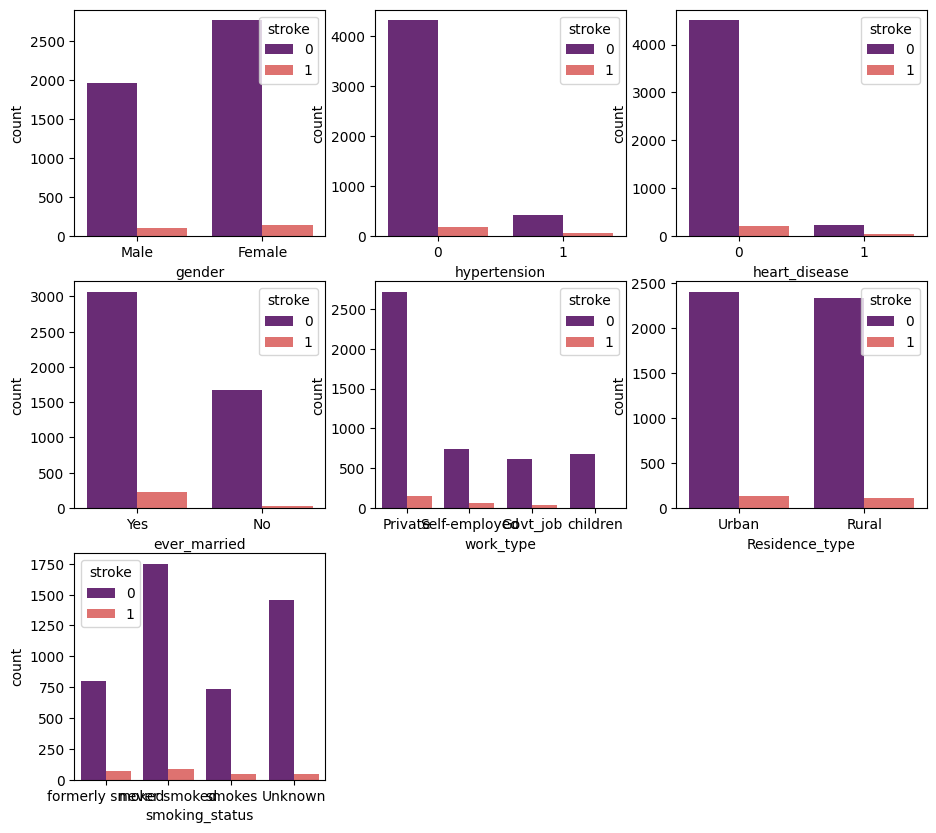

In [23]:
#the distribution of each feature
columns = ['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type',
       'smoking_status']
def seabornHist(data):
    plt.figure(figsize=(11,10))
    for i in range(len(columns)):
        plt.subplot(3,3,i+1)
        sns.countplot(x=data[columns[i]],hue = data['stroke'],palette = 'magma')
seabornHist(brain_df)

From above graphs, we can see that the data contains childern. The first think we need to do to see how many childern are in this data? did any one ever had a stroke?

In [25]:
# Isolate the pateint under the age of 18 years old
young_patient = brain_df[brain_df.age < 18]
young_patient

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
205,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1
208,Male,3.00,0,0,No,children,Rural,95.12,18.0,Unknown,0
210,Female,8.00,0,0,No,Private,Urban,110.89,17.6,Unknown,0
237,Female,3.00,0,0,No,children,Urban,73.74,16.0,Unknown,0
239,Male,14.00,0,0,No,Govt_job,Urban,82.34,31.6,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
4947,Female,13.00,0,0,No,children,Rural,219.81,25.7,Unknown,0
4952,Male,8.00,0,0,No,children,Urban,78.76,19.4,Unknown,0
4959,Female,17.00,0,0,No,Private,Urban,92.97,26.5,formerly smoked,0
4962,Male,3.00,0,0,No,children,Rural,194.75,20.1,Unknown,0


In [26]:
#Look for patient under teh age of 18 with stroke
young_patient2= young_patient[young_patient.stroke ==1]
young_patient2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
205,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1
4807,Female,1.32,0,0,No,children,Urban,70.37,18.7,Unknown,1


There are two kids who had a stroke. Having a stroke that young age is not common, it usually caused by either genetics or effect of certain medication.I will remove all the rows with pateint under the age of 18 years old.

In [11]:
# Removing young pateints
data_with_adult = brain_df[brain_df['age'] >= 18]
data_with_adult.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [12]:
data_with_adult.shape

(4158, 11)

In [16]:
# to confirm there is no childern in this data
uniqueValue(data_with_adult)

gender : ['Male' 'Female']
ever_married : ['Yes' 'No']
work_type : ['Private' 'Self-employed' 'Govt_job']
Residence_type : ['Urban' 'Rural']
smoking_status : ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [17]:
# look if there is a null value
data_with_adult.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Looking for relationship between the target variable and the numerical variables

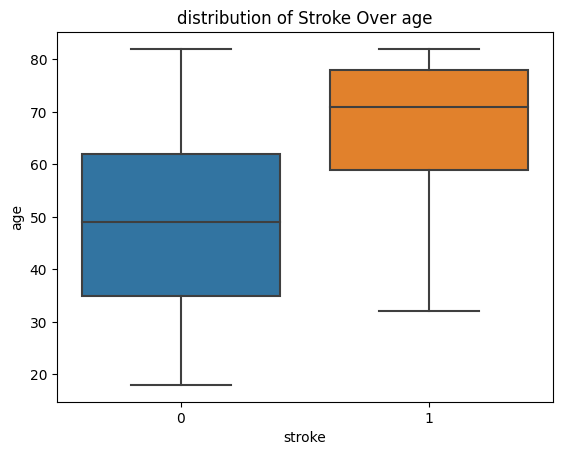

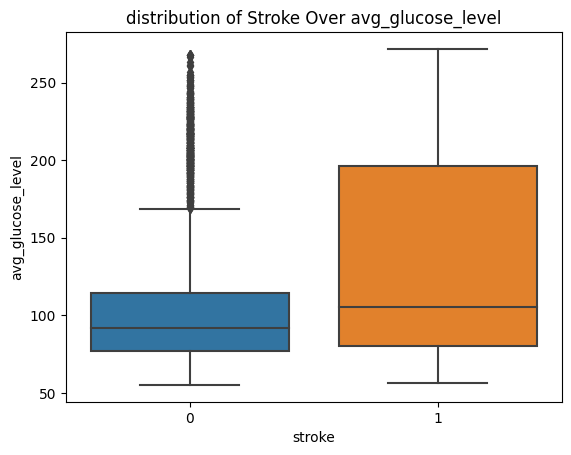

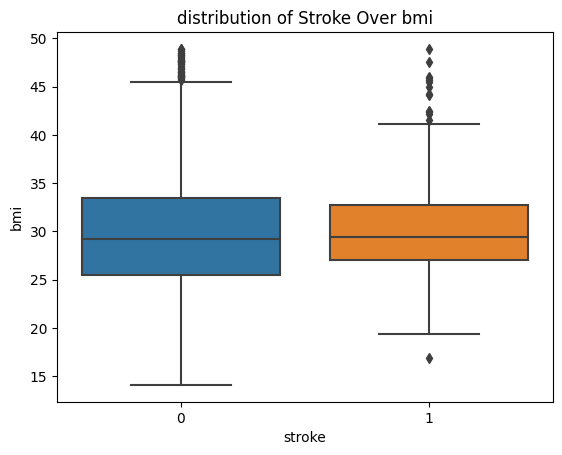

In [28]:
# function to create a boxplot for the data for the numerical variable to look for outliers
def numVariableVsTarget (data):
    for column in data.select_dtypes('float'):
        sns.boxplot(data=data,x='stroke',y=column)
        plt.title(f'distribution of Stroke Over {column}')
        plt.show()
numVariableVsTarget(data_with_adult)

There is outliers in the BMI and glucose level features

In [29]:
#Inspecting BMI feature
data_with_adult['bmi'].describe()

count    4158.000000
mean       29.925349
std         6.101635
min        14.100000
25%        25.500000
50%        29.200000
75%        33.500000
max        48.900000
Name: bmi, dtype: float64

In [30]:
# calculating the 10% and 90% quantile to see how far the max and min value are from them 
print(data_with_adult['bmi'].quantile(0.10))
print(data_with_adult['bmi'].quantile(0.90))

22.6
38.6


Most of the outliers falls under the stroke patient, I will leave the outliers and assess it after training the machine.

In [31]:
#inspecting the glucose level
data_with_adult['avg_glucose_level'].describe()

count    4158.000000
mean      108.238742
std        47.518409
min        55.120000
25%        77.452500
50%        92.360000
75%       115.897500
max       271.740000
Name: avg_glucose_level, dtype: float64

In [32]:
# calculating the 10% and 90% quantile to see how far the max and min value are from them 
print(data_with_adult['avg_glucose_level'].quantile(0.10))
print(data_with_adult['avg_glucose_level'].quantile(0.90))

65.98
199.186


I will not remove or modified any of teh outliers as it can affect the training the model. I will reassess after the training.

Let evaluate the numerical features and see if there is any correlation between them

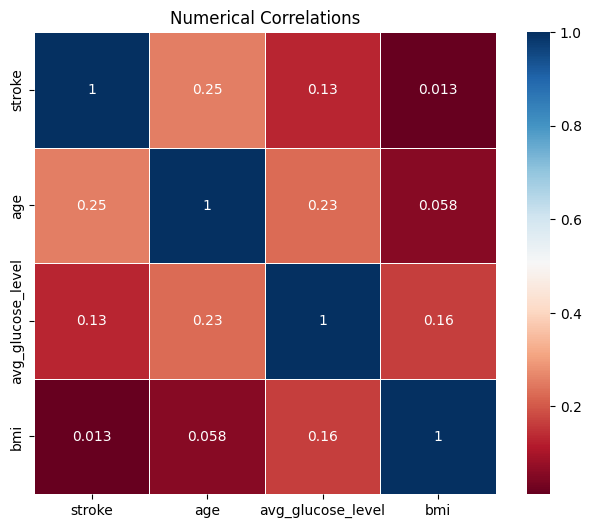

In [33]:
# Numerical Data Correlation heat map

plt.figure(figsize=(8, 6)) 
colormap = plt.cm.RdBu
heatmap_data = data_with_adult[[ 'stroke','age', 'avg_glucose_level', 'bmi']]
plt.title("Numerical Correlations")
sns.heatmap(data=heatmap_data.astype(float).corr(), cmap=colormap, linewidths=0.5, vmax=1.0, square=True, annot=True, annot_kws={"size": 10})

plt.show()
del heatmap_data

It seems that there isn't mach correlation between them.

evaluating Categorical features and their distribution.

In [34]:
categoricals = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [35]:
uniqueValue(data_with_adult)

gender : ['Male' 'Female']
ever_married : ['Yes' 'No']
work_type : ['Private' 'Self-employed' 'Govt_job']
Residence_type : ['Urban' 'Rural']
smoking_status : ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [38]:
# gender and stroke
pd.crosstab(data_with_adult['gender'], data_with_adult['stroke'], margins=True).style.background_gradient(cmap='tab10')

stroke,0,1,All
gender,,,
Female,2368,138,2506
Male,1544,108,1652
All,3912,246,4158


most patients in our data are females

In [39]:
#heart disease and stroke
pd.crosstab(data_with_adult['heart_disease'], data_with_adult['stroke'], margins=True).style.background_gradient(cmap='tab10')

stroke,0,1,All
heart_disease,,,
0,3685,199,3884
1,227,47,274
All,3912,246,4158


Most stroke patients did not have heart disease

In [40]:
# hypertension and stroke
pd.crosstab(data_with_adult['hypertension'], data_with_adult['stroke'], margins=True).style.background_gradient(cmap='tab10')

stroke,0,1,All
hypertension,,,
0,3499,180,3679
1,413,66,479
All,3912,246,4158


Most stroke patients did not have hypertension

In [45]:
#ever_maried and stroke
pd.crosstab(data_with_adult['ever_married'], data_with_adult['stroke'], margins=True).style.background_gradient(cmap='tab10')

stroke,0,1,All
ever_married,,,
No,851,27,878
Yes,3061,219,3280
All,3912,246,4158


Most stroke patients are married

In [42]:
#work_type and stroke
pd.crosstab(data_with_adult['work_type'], data_with_adult['stroke'], margins=True).style.background_gradient(cmap='tab10')

stroke,0,1,All
work_type,,,
Govt_job,605,33,638
Private,2580,148,2728
Self-employed,727,65,792
All,3912,246,4158


Most stroke patients works in teh private sector, however most of the patients in this data work in the private sector

In [46]:
#Resideny_ type and stroke
pd.crosstab(data_with_adult['Residence_type'], data_with_adult['stroke'], margins=True).style.background_gradient(cmap='tab10')

stroke,0,1,All
Residence_type,,,
Rural,1921,112,2033
Urban,1991,134,2125
All,3912,246,4158


Most patients with stroke live in urban areas

In [47]:
# smoking status and stroke
pd.crosstab(data_with_adult['smoking_status'], data_with_adult['stroke'], margins=True).style.background_gradient(cmap='tab10')

stroke,0,1,All
smoking_status,,,
Unknown,794,45,839
formerly smoked,772,70,842
never smoked,1621,89,1710
smokes,725,42,767
All,3912,246,4158


If add the formerly smoked and the smokers, 7.5% of them had a stroke. Where the never smoked make 5.5% of tehm had a stroke

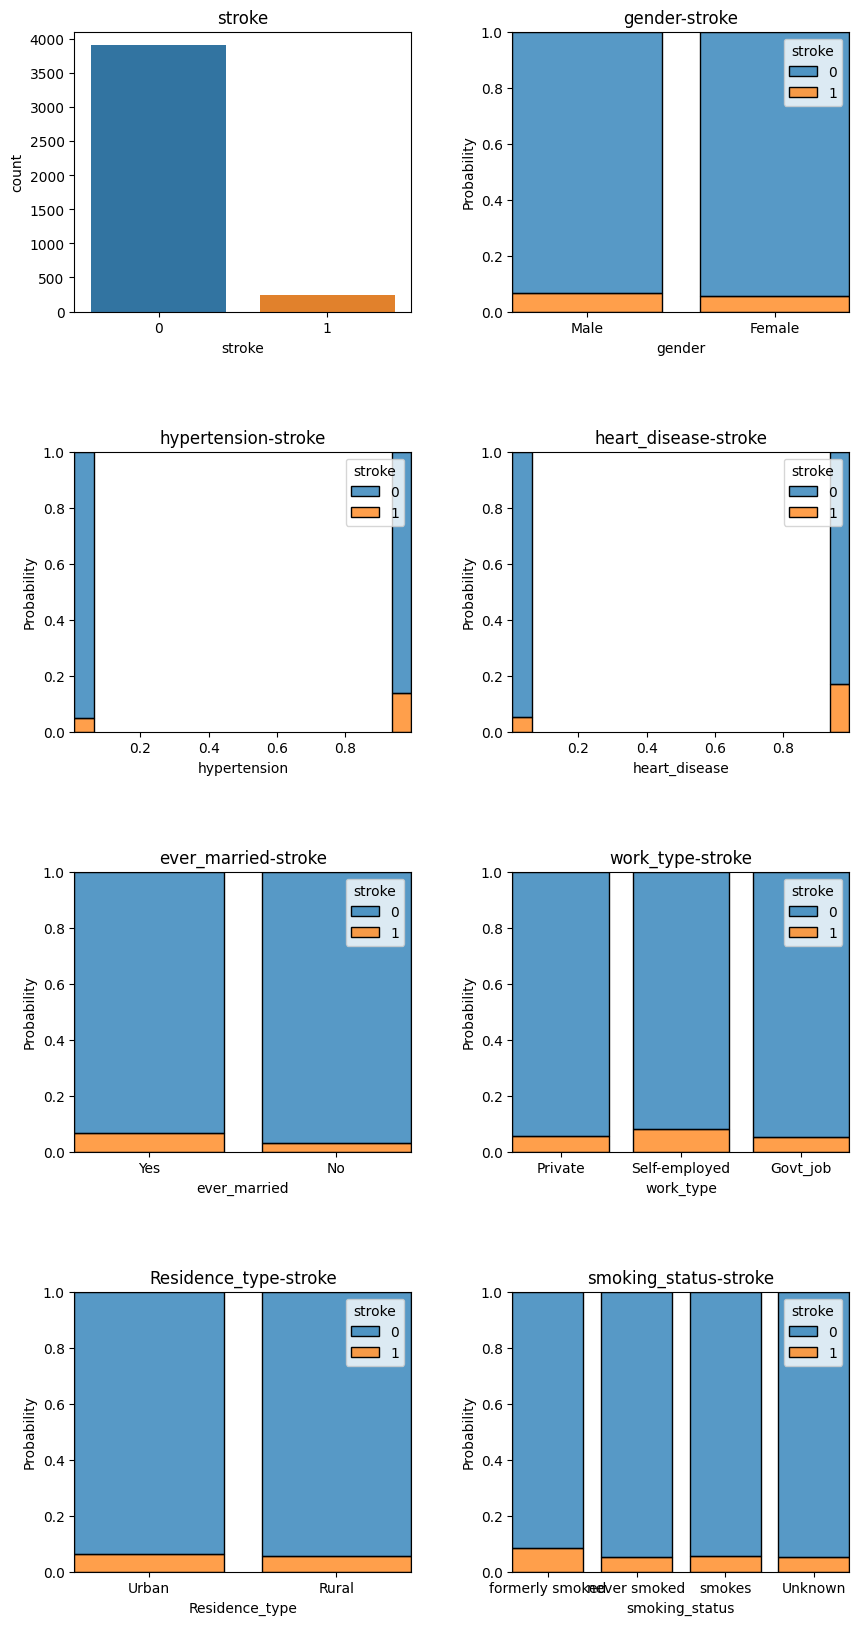

In [48]:
# Categorical Data Distribution and probability of getting a stroke
f, ax = plt.subplots(4, 2, figsize=(10, 20))

sns.countplot(data=data_with_adult, x='stroke', ax=ax[0, 0])
ax[0, 0].set_title('stroke')

for idx, t in enumerate(categoricals, start=1):
    a, b = divmod(idx, 2)
    sns.histplot(data=data_with_adult, x=t, hue='stroke', shrink=0.8, multiple='fill', stat='probability', ax=ax[a, b])
    ax[a, b].set_title(f'{t}-stroke')


plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

Let evaluate the number of patient with stroke and without stroke

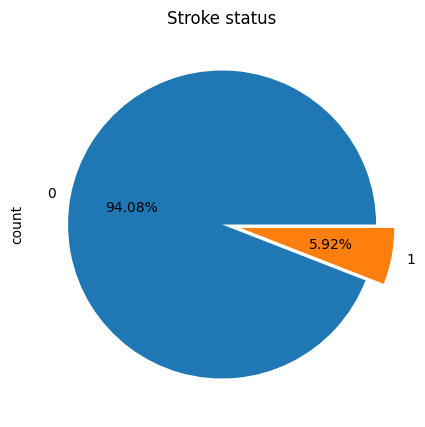

In [49]:
# the percentage of the patients with stroke
y = data_with_adult['stroke']
plt.figure(figsize=(7, 5))
y.value_counts().plot.pie(autopct="%1.2f%%", colors=sns.color_palette('tab10'), explode=[0, 0.12], title='Stroke status');

The number of pateint without stroke is bigger then the number of pateint with stroke.

In [50]:
#Seperating the data for patients with stroke
data = data_with_adult[data_with_adult['stroke'] == 1]

In [51]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


Data expploration for the pateint with stroke:

<Axes: xlabel='age', ylabel='Count'>

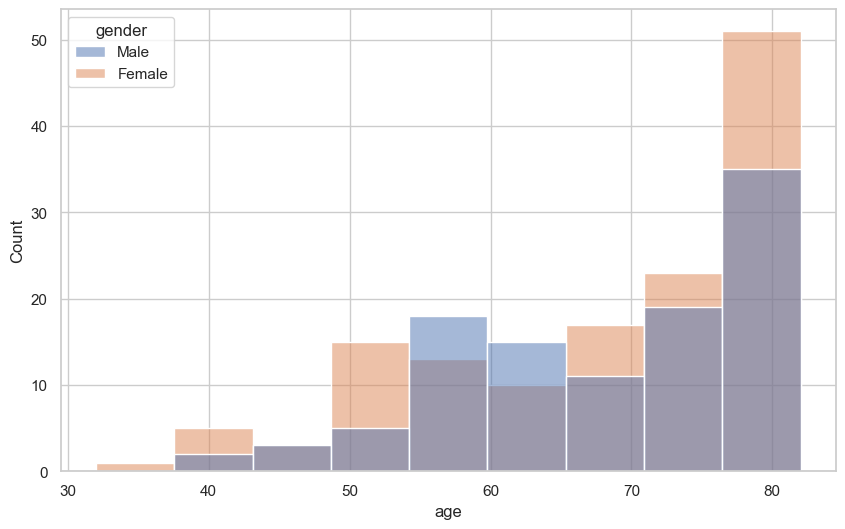

In [52]:
# age distribution
sns.set_theme(style = 'whitegrid')
plt.figure(figsize=(10,6))
sns.histplot(data=data,x="age",hue="gender")

In [53]:
# gender distrubtion
data_gender=data.groupby('gender').count()['stroke']
data_gender

gender
Female    138
Male      108
Name: stroke, dtype: int64

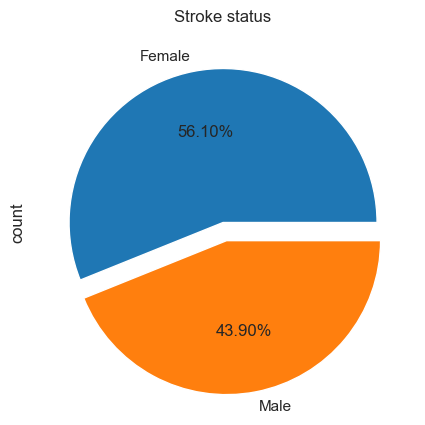

In [54]:
#gender distribution pie graph
y = data['gender']
plt.figure(figsize=(7, 5))
y.value_counts().plot.pie(autopct="%1.2f%%", colors=sns.color_palette('tab10'), explode=[0, 0.12], title='Stroke status');

In [55]:
#Stroke poatient age distribution with gender
#Extracting Data on basis of Gender
male_data=data[data["gender"]=='Male']
female_data=data[data["gender"]=='Female'] 

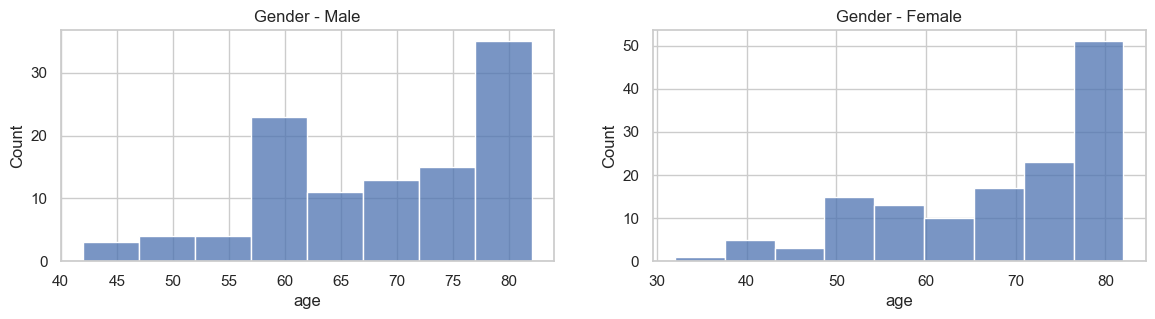

In [56]:
sns.set_theme(style = 'whitegrid')
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(14,3))
ax1.title.set_text('Gender - Male')
sns.histplot(data=male_data,x="age",ax=ax1,)
sns.histplot(data=female_data,x="age",ax=ax2)
ax2.title.set_text('Gender - Female')

Male patients are between the age of 42 -82, females are between 32 -82. Most male patients with stroke are between 52 and 82 however women are between 48-82.

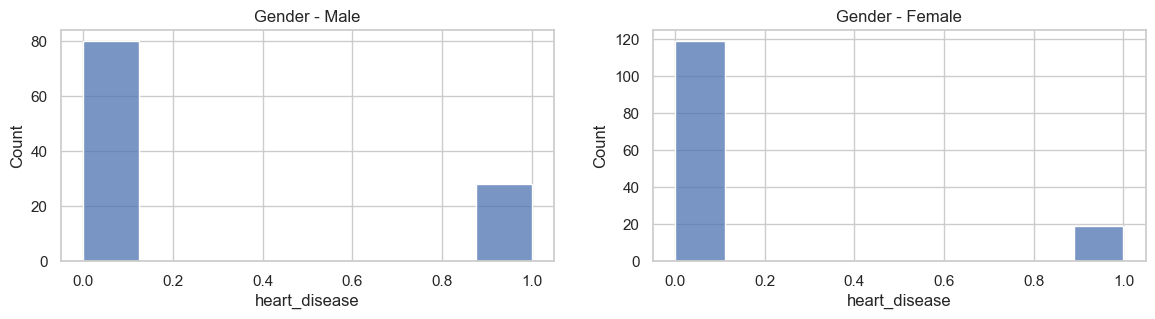

In [57]:
# heart disease distribution for patients with stroke by gender
sns.set_theme(style = 'whitegrid')
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(14,3))
ax1.title.set_text('Gender - Male')
sns.histplot(data=male_data,x="heart_disease",ax=ax1,)
sns.histplot(data=female_data,x="heart_disease",ax=ax2)
ax2.title.set_text('Gender - Female')

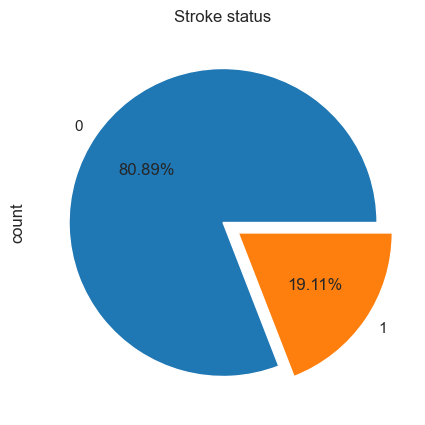

In [58]:
# heart disease distribution for stroke patient
y = data['heart_disease']
plt.figure(figsize=(7, 5))
y.value_counts().plot.pie(autopct="%1.2f%%", colors=sns.color_palette('tab10'), explode=[0, 0.12], title='Stroke status');

19% of the stroke patients have heart disease

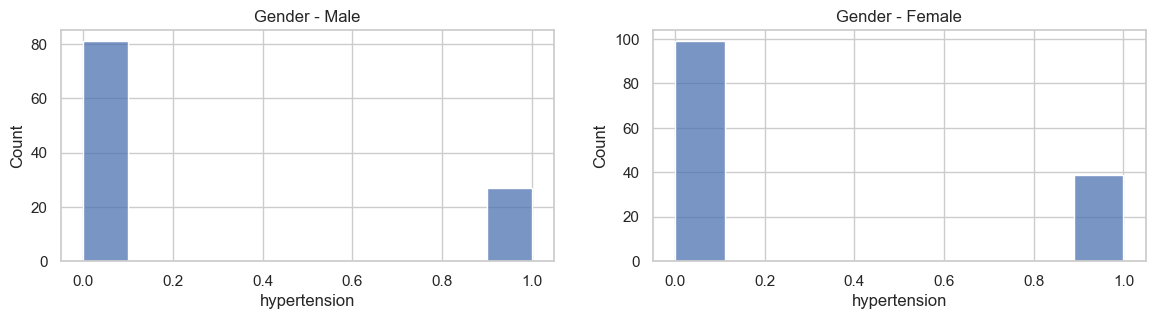

In [59]:
# hypertension distribution for patients with stroke by gender
sns.set_theme(style = 'whitegrid')
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(14,3))
ax1.title.set_text('Gender - Male')
sns.histplot(data=male_data,x="hypertension",ax=ax1,)
sns.histplot(data=female_data,x="hypertension",ax=ax2)
ax2.title.set_text('Gender - Female')

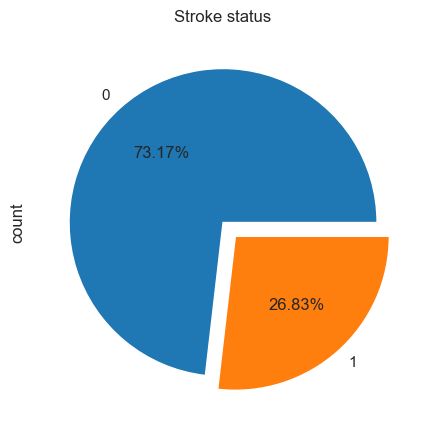

In [62]:
#hypertension distribution for stroke patient
y = data['hypertension']
plt.figure(figsize=(7, 5))
y.value_counts().plot.pie(autopct="%1.2f%%", colors=sns.color_palette('tab10'), explode=[0, 0.12], title='Stroke status');

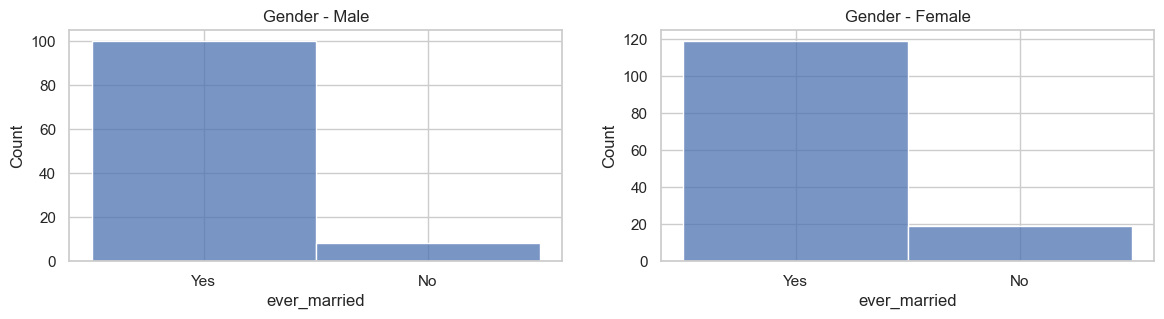

In [65]:
# ever_married distribution for patients with stroke by gender
sns.set_theme(style = 'whitegrid')
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(14,3))
ax1.title.set_text('Gender - Male')
sns.histplot(data=male_data,x="ever_married",ax=ax1,)
sns.histplot(data=female_data,x="ever_married",ax=ax2)
ax2.title.set_text('Gender - Female')

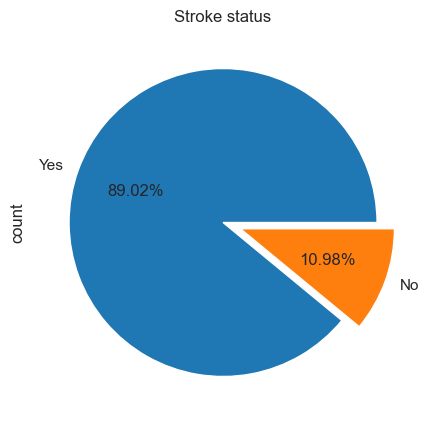

In [68]:
#ever_married distribution for stroke patient
y = data['ever_married']
plt.figure(figsize=(7, 5))
y.value_counts().plot.pie(autopct="%1.2f%%", colors=sns.color_palette('tab10'), explode=[0, 0.12], title='Stroke status');

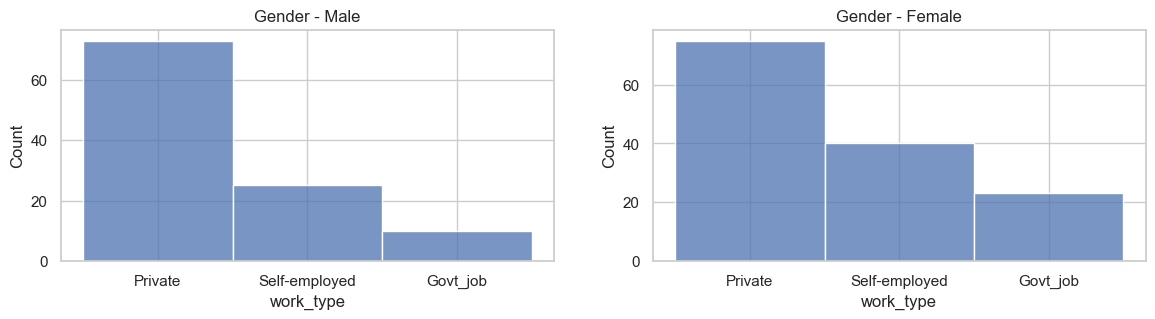

In [76]:
# work_type distribution for patients with stroke by gender
sns.set_theme(style = 'whitegrid')
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(14,3))
ax1.title.set_text('Gender - Male')
sns.histplot(data=male_data,x="work_type",ax=ax1,)
sns.histplot(data=female_data,x="work_type",ax=ax2)
ax2.title.set_text('Gender - Female')

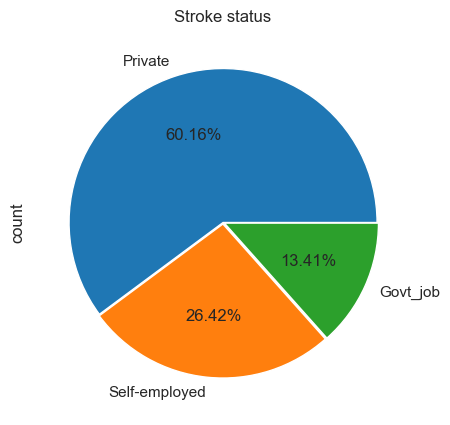

In [77]:
#work_type distribution for stroke patient
y = data['work_type']
plt.figure(figsize=(7, 5))
y.value_counts().plot.pie(autopct="%1.2f%%", colors=sns.color_palette('tab10'), explode=[0, 0.01, 0.01], title='Stroke status');

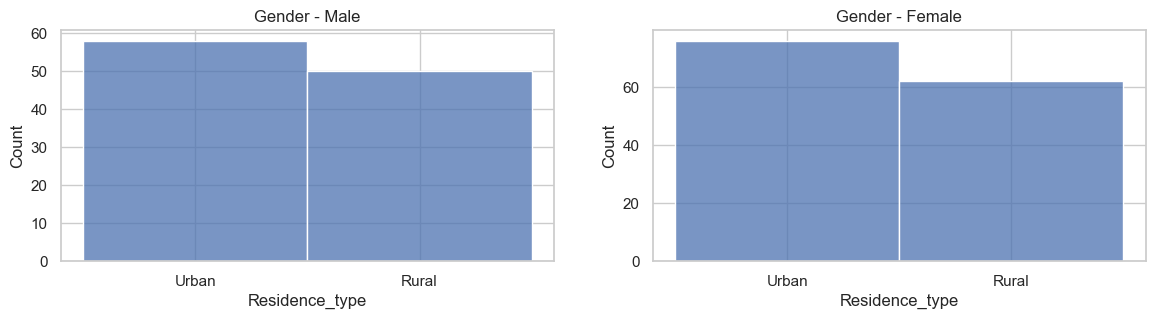

In [78]:
# Residence_type distribution for patients with stroke by gender
sns.set_theme(style = 'whitegrid')
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(14,3))
ax1.title.set_text('Gender - Male')
sns.histplot(data=male_data,x="Residence_type",ax=ax1,)
sns.histplot(data=female_data,x="Residence_type",ax=ax2)
ax2.title.set_text('Gender - Female')

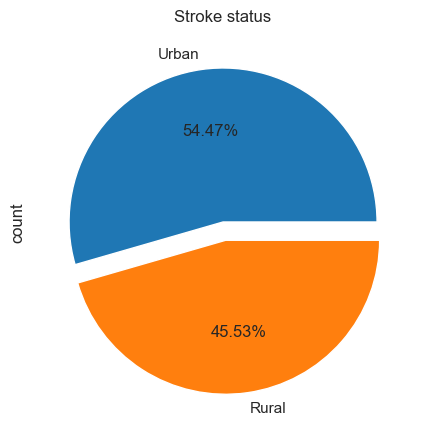

In [79]:
#Residence_type distribution for stroke patient
y = data['Residence_type']
plt.figure(figsize=(7, 5))
y.value_counts().plot.pie(autopct="%1.2f%%", colors=sns.color_palette('tab10'), explode=[0, 0.12], title='Stroke status');

The data is imbalanced, I will use the repetition technique to to make 30% of the total data are patient with stroke

In [80]:
data_with_adult_2 = pd.concat([data_with_adult, data])

In [82]:
data_with_adult_2 = pd.concat([data_with_adult_2, data])

In [84]:
data_with_adult_2 = pd.concat([data_with_adult_2, data])

In [86]:
data_with_adult_2 = pd.concat([data_with_adult_2, data])

In [87]:
data_with_adult_2 = pd.concat([data_with_adult_2, data])

In [90]:
data_with_adult_2 = pd.concat([data_with_adult_2, data])

In [91]:
data_with_adult_2['stroke'].value_counts()

stroke
0    3912
1    1722
Name: count, dtype: int64

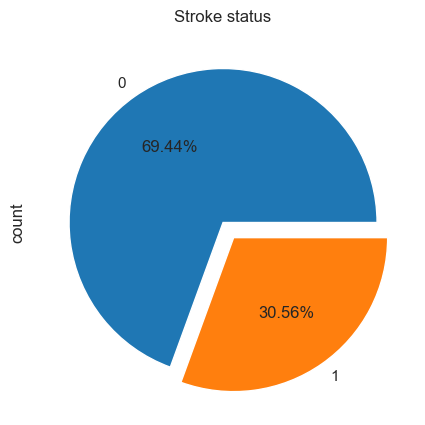

In [92]:
# checking teh data
y = data_with_adult_2['stroke']
plt.figure(figsize=(7, 5))
y.value_counts().plot.pie(autopct="%1.2f%%", colors=sns.color_palette('tab10'), explode=[0, 0.12], title='Stroke status');

In [94]:
data_with_adult_2.to_csv('data_with_adult2.csv', index=False)